In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from collections import Counter

In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.max_rows', 200)

In [3]:
initial_df = pd.read_csv('Data_files/stack-overflow-developer-survey-2023/survey_results_public.csv')
questions_df = pd.read_csv('Data_files/stack-overflow-developer-survey-2023/survey_results_schema.csv')

In [4]:
EUR_PLN = 4.3

In [5]:
x = np.arange(1, 11)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
y = x ** 2
z = x ** 1.5

Text(0.5, 1.0, 'Simple chart')

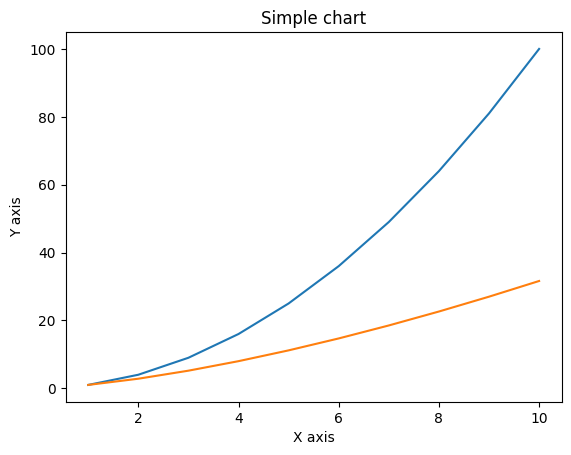

In [7]:
plt.plot(x, y)
plt.plot(x, z)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Simple chart')

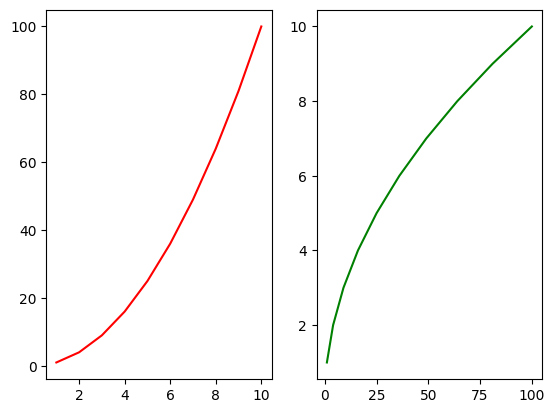

In [8]:
plt.subplot(1, 2, 1)
plt.plot(x, y, 'r')

plt.subplot(1, 2, 2)
plt.plot(y, x, 'g')

Text(0.5, 1.0, 'Smaller chart')

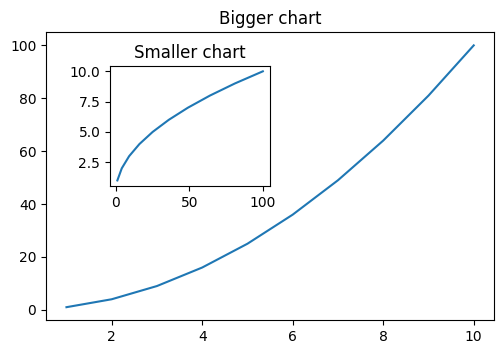

In [9]:
fig = plt.figure()

axes1 = fig.add_axes((0.1, 0.1, 0.7, 0.6))
axes2 = fig.add_axes((0.2, 0.38, 0.25, 0.25))

axes1.plot(x, y)
axes1.set_title('Bigger chart')
axes2.plot(y, x)
axes2.set_title('Smaller chart')

## StackOverflow developer survey

In [10]:
initial_df.head(3)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,"285,000.00"
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,"250,000.00"


In [11]:
initial_df.info(max_cols=10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Columns: 84 entries, ResponseId to ConvertedCompYearly
dtypes: float64(3), int64(1), object(80)
memory usage: 57.2+ MB


## Get full questions

In [12]:
questions_df.head(3)

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB


In [13]:
questions_df[['qname', 'question']]

# questions_df.loc[questions_df['qname'] == 'S2', 'question'].item()

only_questions_df = questions_df.loc[questions_df['qname'].isin(initial_df.columns), ['qname', 'question']]
only_questions_df.head()

,qname,question
3,Q120,
5,MainBranch,Which of the following options best describes ...
6,Age,What is your age? *
7,Employment,Which of the following best describes your cur...
8,RemoteWork,Which best describes your current work situation?


In [14]:
print(only_questions_df.shape)
print(questions_df.shape)
print(initial_df.shape)

(50, 2)
(78, 6)
(89184, 84)


### Question names unexplained in a schema dataset

In [15]:
question_name_series = pd.Series(initial_df.columns)

unexlained_question = question_name_series[~question_name_series.isin(questions_df['qname'])]
unexlained_question.name = 'Question names unexplained in a schema dataset'

print(f'Total questions: {question_name_series.shape}')
print(f'Number of explained questions: {only_questions_df.shape}')
print(f'Number of unexplained questions: {unexlained_question.shape}\n')

unexlained_question.head(8)

Total questions: (84,)
Number of explained questions: (50, 2)
Number of unexplained questions: (34,)



0                 ResponseId
21    LanguageHaveWorkedWith
22    LanguageWantToWorkWith
23    DatabaseHaveWorkedWith
24    DatabaseWantToWorkWith
25    PlatformHaveWorkedWith
26    PlatformWantToWorkWith
27    WebframeHaveWorkedWith
Name: Question names unexplained in a schema dataset, dtype: object

## Clean questions dataframe

### 1st way

In [16]:
list_questions = []

for qname in initial_df.columns:
    if qname in questions_df['qname'].to_list():
        list_questions.append(
            questions_df.loc[questions_df['qname'] == qname, 'question'].item()
        )
    else:
        list_questions.append(None)
        

clean_questions_df = pd.DataFrame(
    {'qname': initial_df.columns,
    'question': list_questions}
)

clean_questions_df.head(3)

,qname,question
0,ResponseId,None
1,Q120,
2,MainBranch,Which of the following options best describes ...


### 2nd way

In [17]:
clean_questions_df = pd.DataFrame(
    {'qname': initial_df.columns}
)

clean_questions_df = clean_questions_df.merge(
    questions_df[['qname', 'question']],
    how='left',
    on='qname'
)

# print(clean_questions_df.shape)
# clean_questions_df

### 3rd way

In [18]:
question_name_series = pd.Series(
    data=initial_df.columns,
    name='qname'
)

clean_questions_df = questions_df[['qname', 'question']].merge(
    question_name_series,
    how='right',
    on='qname'
)

print(clean_questions_df.shape)
clean_questions_df

(84, 2)


,qname,question
0,ResponseId,NaN
1,Q120,
2,MainBranch,Which of the following options best describes ...
3,Age,What is your age? *
4,Employment,Which of the following best describes your cur...
5,RemoteWork,Which best describes your current work situation?
6,CodingActivities,Which of the following best describes the code...
7,EdLevel,Which of the following best describes the high...
8,LearnCode,How do you learn to code? Select all that apply.
9,LearnCodeOnline,What online resources do you use to learn to c...


In [19]:
print(f'Corrency: {clean_questions_df.loc[clean_questions_df['qname'] == 'Currency', 'question'].item()}\n')
print(f'Annual Salary: {clean_questions_df.loc[clean_questions_df['qname'] == 'CompTotal', 'question'].item()}\n')

# clean_questions_df.loc[clean_questions_df['qname'] == 'ConvertedCompYearly', 'question'].item()


Corrency: Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in. *

Annual Salary: What is your current total <b>annual</b> compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent yearly salary. If you prefer not to answer, please leave the box empty.



### Practice dataframe

In [20]:
interesting_cols = ['MainBranch', 'Age', 'Employment', 'EdLevel',
                    'LearnCodeCoursesCert', 'YearsCode', 'Country',
                    'LanguageHaveWorkedWith', 'AIToolCurrently Using',
                    'TimeSearching', 'Industry', 'ConvertedCompYearly']

practice_df = initial_df.loc[[random.randint(0, initial_df.shape[0]-1) for n in range(50)], interesting_cols]
# practice_df = initial_df.loc[initial_df['Country'] == 'Poland', interesting_cols]


# practice_df.index = index=range(0, practice_df.shape[0])
practice_df.reset_index(drop=True, inplace=True)

practice_df.rename(
    columns={'ConvertedCompYearly': 'AnnualSalaryEUR'},
    inplace=True
)

practice_df['MonthlySalaryPLN'] = practice_df['AnnualSalaryEUR'] * EUR_PLN / 12

practice_df.head(1)

,MainBranch,Age,Employment,EdLevel,LearnCodeCoursesCert,YearsCode,Country,LanguageHaveWorkedWith,AIToolCurrently Using,TimeSearching,Industry,AnnualSalaryEUR,MonthlySalaryPLN
0,I am a developer by profession,18-24 years old,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,13,France,Rust;TypeScript,Writing code;Debugging and getting help,15-30 minutes a day,"Information Services, IT, Software Development...","51,403.00","18,419.41"


#### Reorder columns

In [21]:
LearnCodeCoursesCert = practice_df.pop('LearnCodeCoursesCert')
AnnualSalaryEUR = practice_df.pop('AnnualSalaryEUR')
MonthlySalaryPLN = practice_df.pop('MonthlySalaryPLN')

# practice_df.insert(6, 'MonthlySalaryPLN', MonthlySalaryPLN.fillna(-1).round().astype(int).apply("{:,}".format).replace('-1', np.nan))
# practice_df.insert(6, 'AnnualSalaryEUR', AnnualSalaryEUR.fillna(-1).round().astype(int).apply("{:,}".format).replace('-1', np.nan))
# practice_df.insert(len(practice_df.columns), 'LearnCodeCoursesCert', LearnCodeCoursesCert)

practice_df.insert(6, 'MonthlySalaryPLN', MonthlySalaryPLN.round())
practice_df.insert(6, 'AnnualSalaryEUR', AnnualSalaryEUR.round())
practice_df.insert(len(practice_df.columns), 'LearnCodeCoursesCert', LearnCodeCoursesCert)

In [22]:
practice_df[practice_df['MonthlySalaryPLN'].notna()].head()

,MainBranch,Age,Employment,EdLevel,YearsCode,Country,AnnualSalaryEUR,MonthlySalaryPLN,LanguageHaveWorkedWith,AIToolCurrently Using,TimeSearching,Industry,LearnCodeCoursesCert
0,I am a developer by profession,18-24 years old,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",13,France,"51,403.00","18,419.00",Rust;TypeScript,Writing code;Debugging and getting help,15-30 minutes a day,"Information Services, IT, Software Development...",NaN
2,I am a developer by profession,35-44 years old,"Employed, full-time;Independent contractor, fr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,Brazil,"120,000.00","43,000.00",JavaScript;Kotlin,NaN,15-30 minutes a day,"Information Services, IT, Software Development...",edX;Udemy;Coursera;Udacity
4,I am a developer by profession,18-24 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,United States of America,"84,000.00","30,100.00",Bash/Shell (all shells);C,NaN,NaN,NaN,NaN
8,I am a developer by profession,35-44 years old,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",22,Canada,"81,787.00","29,307.00",C#;JavaScript;TypeScript,Writing code;Documenting code;Testing code;Com...,NaN,NaN,Udemy;Pluralsight
9,I am a developer by profession,35-44 years old,"Employed, full-time","Associate degree (A.A., A.S., etc.)",18,Taiwan,"71,706.00","25,695.00",Java;JavaScript,NaN,NaN,NaN,NaN


In [23]:
practice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              50 non-null     object 
 1   Age                     50 non-null     object 
 2   Employment              50 non-null     object 
 3   EdLevel                 50 non-null     object 
 4   YearsCode               50 non-null     object 
 5   Country                 50 non-null     object 
 6   AnnualSalaryEUR         30 non-null     float64
 7   MonthlySalaryPLN        30 non-null     float64
 8   LanguageHaveWorkedWith  50 non-null     object 
 9   AIToolCurrently Using   19 non-null     object 
 10  TimeSearching           19 non-null     object 
 11  Industry                16 non-null     object 
 12  LearnCodeCoursesCert    20 non-null     object 
dtypes: float64(2), object(11)
memory usage: 5.2+ KB


### Plot median salaries for different ages

In [24]:
median_salaries_row = initial_df.groupby('Age')['ConvertedCompYearly'].median()
median_salaries_row

Age
18-24 years old       37,931.00
25-34 years old       66,700.00
35-44 years old       90,987.00
45-54 years old      100,656.50
55-64 years old      110,000.00
65 years or older    107,090.00
Prefer not to say    121,630.00
Under 18 years old    13,226.00
Name: ConvertedCompYearly, dtype: float64

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'CHART')

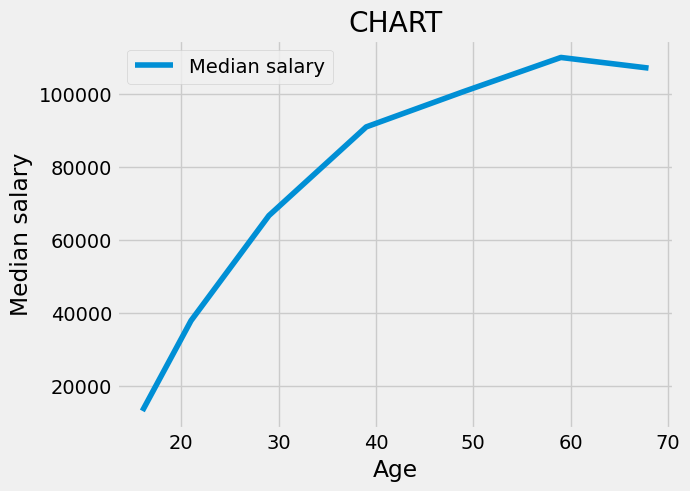

In [25]:
median_salaries = pd.DataFrame(
    {'Age': [16, 21, 29, 39, 49, 59, 68],
     'Median salary': [13226, 37931, 66700, 90987, 100656, 110000, 107090]}
)

median_salaries

# plt.plot(median_salaries['Age'], median_salaries['Median salary'])
print(plt.style.available)
plt.style.use('fivethirtyeight')

plt.plot('Age', 'Median salary', data=median_salaries, label='Median salary')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Median salary')
plt.title('CHART')

In [26]:
print(type(np.arange(0, 11)))
np.arange(0, 11)

<class 'numpy.ndarray'>


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

### Popularity of programming languages

In [27]:
language_popularity = initial_df['LanguageHaveWorkedWith']

counter_lang = Counter()

for row in language_popularity:
    if type(row) != float:
        counter_lang.update(row.split(";"))
    
languages = []
languages_usage = []

for item in counter_lang.most_common(15):
    languages.append(item[0])
    languages_usage.append(item[1])

languages_usage.reverse()
languages.reverse()

language_popularity = pd.DataFrame(
    {'Language': languages,
    'Popularity': languages_usage}
)

language_popularity

,Language,Popularity
0,Kotlin,7935
1,Rust,11427
2,Go,11592
3,PowerShell,11902
4,PHP,16274
5,C,16940
6,C++,19634
7,C#,24193
8,Java,26757
9,Bash/Shell (all shells),28351


Text(0.5, 1.0, 'StackOverflow developer survey 2023')

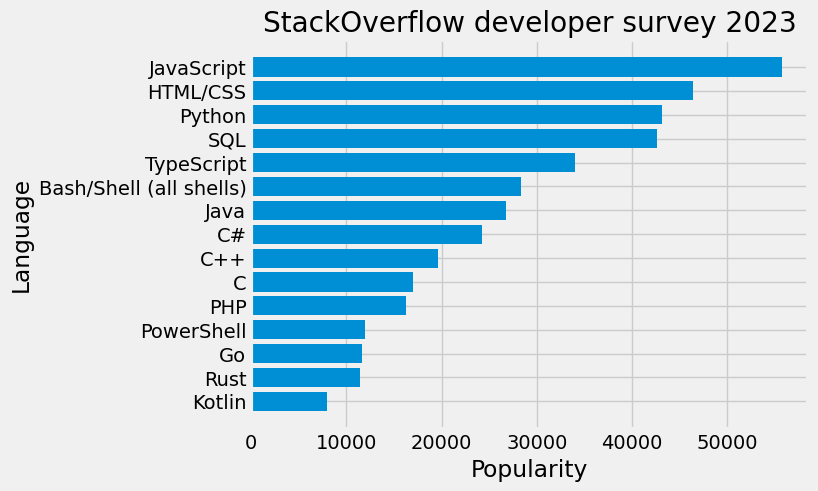

In [28]:
plt.barh(
    'Language',
    'Popularity',
    data=language_popularity
)
plt.xlabel('Popularity')
plt.ylabel('Language')
plt.title('StackOverflow developer survey 2023')

### Top industries

In [29]:
initial_df['Industry'].value_counts().sum()
# Valid entries = 36 744

initial_df['Industry'].isna().sum()
# NaN entries: 52 410

52410

Industry
Information Services, IT, Software Development, or other Technology    18159
Financial Services                                                      4421
Other                                                                   4011
Manufacturing, Transportation, or Supply Chain                          2607
Healthcare                                                              2216
Retail and Consumer Services                                            1955
Higher Education                                                        1242
Advertising Services                                                     786
Insurance                                                                707
Oil & Gas                                                                276
Legal Services                                                           210
Wholesale                                                                184
Name: count, dtype: int64

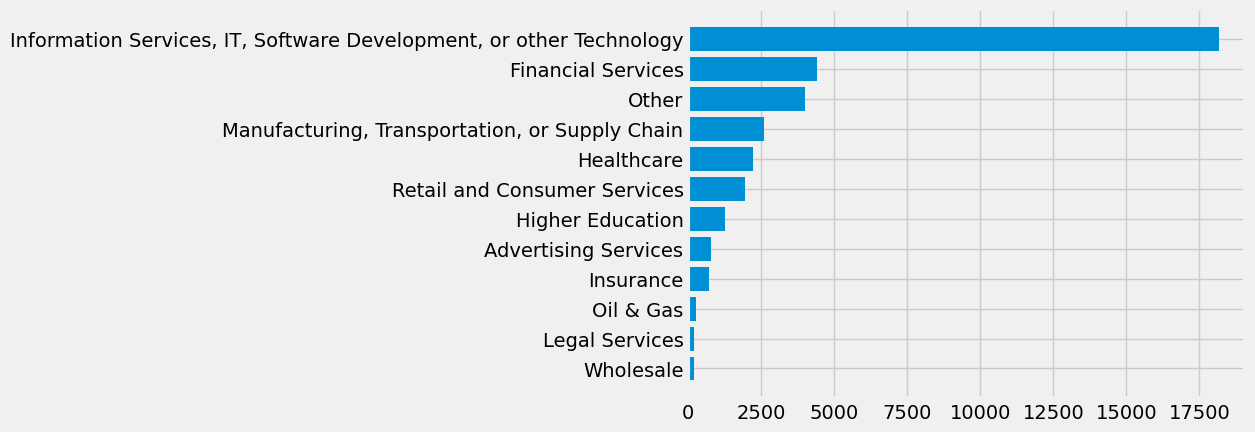

In [30]:
industries = initial_df['Industry'].value_counts()

plt.barh(
    industries.sort_values(ascending=True).index,
    industries.sort_values(ascending=True)
)

industries

### Top 5 industries apart from IT & Information Services

In [31]:
top_5_industries = industries[~industries.index.isin(['Other', 'Information Services, IT, Software Development, or other Technology'])]

others = pd.Series(
    top_5_industries[5:].sum() + industries['Other'],
    index=['Other']
)

top_5_industries = pd.concat([top_5_industries[:5], others]).sort_values(ascending=False)
top_5_industries

Other                                             6174
Financial Services                                4421
Manufacturing, Transportation, or Supply Chain    2607
Healthcare                                        2216
Retail and Consumer Services                      1955
Higher Education                                  1242
dtype: int64

([<matplotlib.patches.Wedge at 0x215802f0290>,
 [Text(1.109952700762121, 1.8994749279921737, 'Other'),
  Text(-2.0940955955625697, 0.674361651226882, 'Financial Services'),
  Text(-1.4109540275338939, -1.6879599320439702, 'Manufacturing, Transportation, or Supply Chain'),
  Text(0.2583751243318826, -2.184775113169885, 'Healthcare'),
  Text(1.6109815245538837, -1.498245149348412, 'Retail and Consumer Services'),
  Text(2.151847557450312, -0.45776859819686844, 'Higher Education')],
 [Text(0.6054287458702478, 1.0360772334502764, '33.2%'),
  Text(-1.142233961215947, 0.3678336279419356, '23.7%'),
  Text(-0.7696112877457602, -0.9207054174785291, '14.0%'),
  Text(0.14093188599920867, -1.1916955162744827, '11.9%'),
  Text(0.8787171952112093, -0.8172246269173155, '10.5%'),
  Text(1.1737350313365338, -0.24969196265283727, '6.7%')])

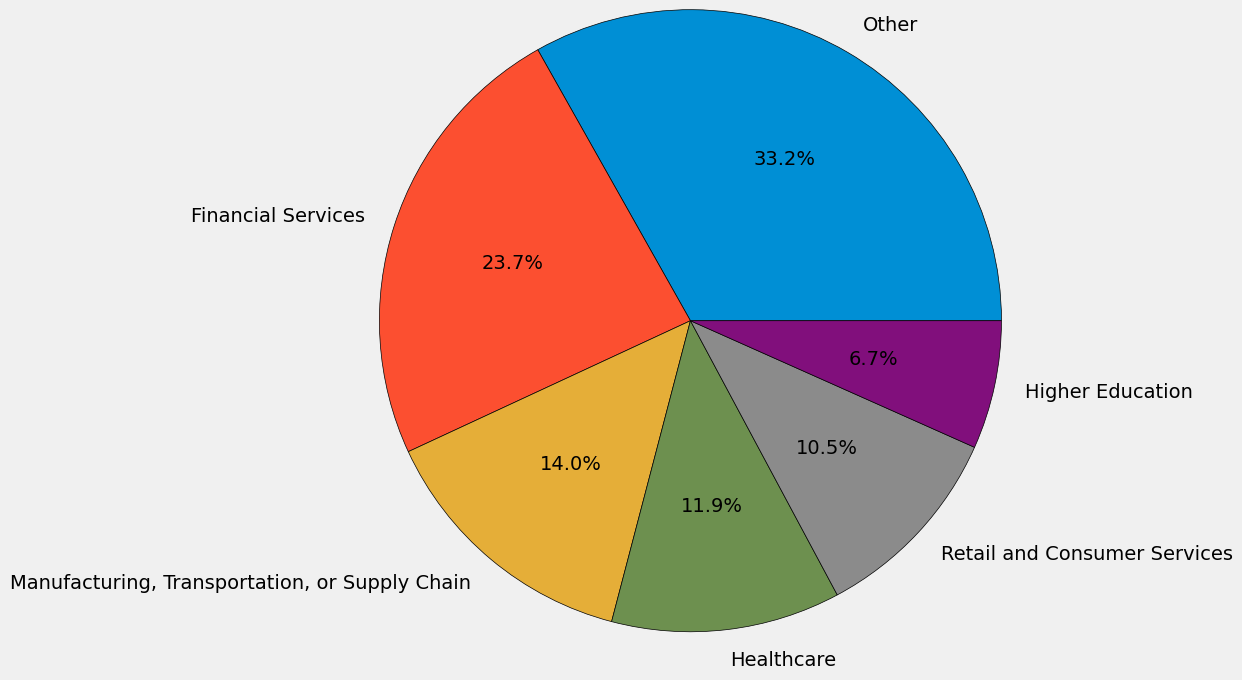

In [32]:
plt.pie(
    top_5_industries,
    labels=top_5_industries.index,
    wedgeprops={'edgecolor': 'black'},
    radius=2,
    autopct='%1.1f%%'
)

In [33]:
apple_names = {
    'Granny Smith': 'Green',
    'Red Delicious': 'Red',
    'Golden Delicious': 'Yellow',
    'Honeycrisp': 'Red and Green',
    'Gala': 'Red and Yellow'
}

for item in apple_names:
    print(apple_names[item])


Green
Red
Yellow
Red and Green
Red and Yellow


In [34]:
np.random.rand(2, 2)
np.random.randn(2, 2)
np.random.randint(0, 11, size=(2, 2))

array([[8, 7],
       [6, 6]])

In [35]:
plt.style.use('seaborn-v0_8-poster')

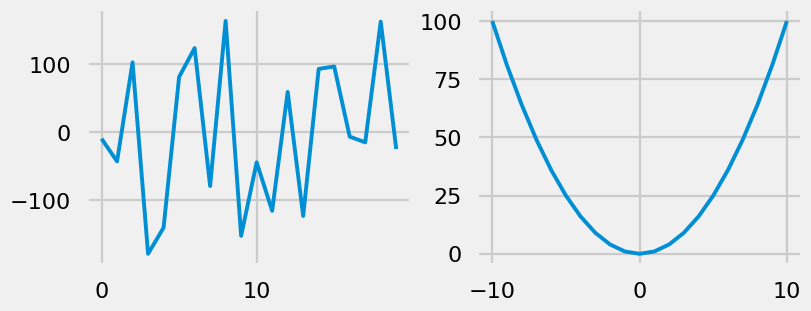

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), layout='constrained')

ax1.plot(
    np.arange(20),
    np.random.randn(20) * 100
)

ax2.plot(
    np.arange(-10, 11),
    np.linspace(-10, 10, 21) ** 2
)

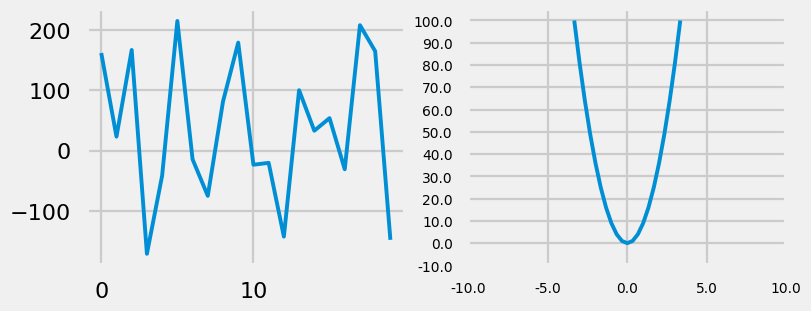

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), layout='constrained')

ax1.plot(
    np.arange(20),
    np.random.randn(20) * 100
)

ax2.plot(
    np.arange(-10, 11),
    np.linspace(-10, 10, 21) ** 2,
    label='quadratic'
)

ax2.set_xticks(
    np.linspace(-30, 30, 5),
    labels=np.linspace(-10, 10, 5),
    fontsize=10
)

ax2.set_yticks(
    np.linspace(-10, 100, 12),
    labels=np.linspace(-10, 100, 12),
    fontsize=10
)

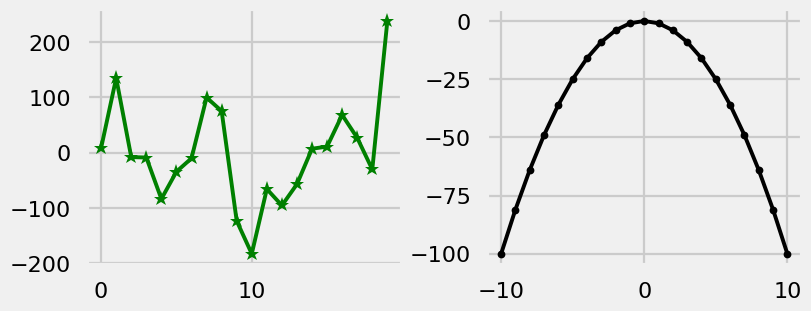

In [46]:
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(8, 3), layout='constrained')

ax3.plot(
    np.arange(20),
    np.random.randn(20) * 100,
    '*-g'
)

ax4.plot(
    np.arange(-10, 11),
    np.linspace(-10, 10, 21) ** 2 * (-1),
    '.-k'
)

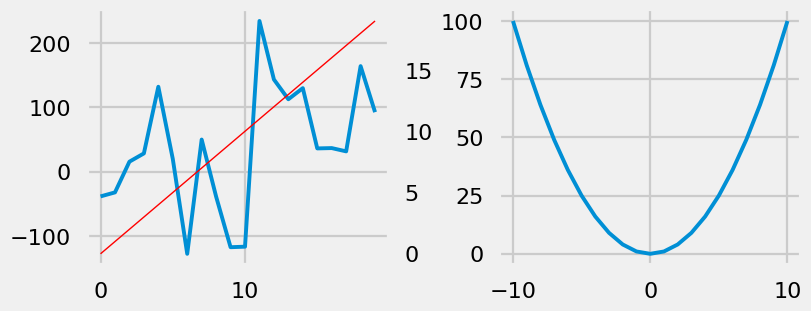

In [53]:
fig, (ax11, ax33) = plt.subplots(1, 2, figsize=(8, 3), layout='constrained')
ax11.plot(
    np.arange(20),
    np.random.randn(20) * 100
)

ax22 = ax11.twinx()
ax22.plot(
    np.arange(20),
    np.arange(20),
    linewidth=1,
    color='red'
)
ax22.grid(visible=False)

ax33.plot(
    np.arange(-10, 11),
    np.linspace(-10, 10, 21) ** 2
)

In [40]:
np.linspace(-10, 9, 20)
np.arange(-10, 11)
np.arange(0, 100, 30)

array([ 0, 30, 60, 90])